###### Assessment

###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [4]:
file1 = '/content/sample_data/college_1.csv'
file2 = '/content/sample_data/college_2.csv'
df_all = pd.concat(map(pd.read_csv,[file1,file2]),ignore_index = True)
df_all.columns

Index(['Name', 'python', 'mysql', 'Previous Geekions', 'CodeKata Score',
       'Department', 'Rising', 'python_en', 'computational_thinking'],
      dtype='object')

###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


In [7]:
#splitiing the csv file based on the Department column
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df_1 = df1.groupby(['Department'])
df_2 = df2.groupby(['Department'])

###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


In [ ]:
df = df_all[df_all['CodeKata Score']> 15000]
df.to_csv('Exceeded expectations.csv')

###### if  10000<codekata score<15000   (Reached_expectations.csv)



In [ ]:
df = df_all[(df_all['CodeKata Score'] > 10000) & (df_all['CodeKata Score'] < 15000)]
df.to_csv('Reached_expectations.csv')

###### if  7000<codekata score<10000   (Needs_Improvement.csv)


In [ ]:
df = df_all[(df_all['CodeKata Score'] > 7000) & (df_all['CodeKata Score'] < 10000)]
df.to_csv('Needs_Improvement.csv')

###### if  codekate score < 7000        (Unsatisfactory.csv)

In [ ]:
df = df_all[df_all['CodeKata Score'] < 7000]
df.to_csv('Unsatisfactory.csv')

###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [ ]:
print('Average of the previous geekions is: ',df_all['Previous Geekions'].mean())
print('Average of this week geekions is: ',df_all['CodeKata Score'].mean())

Average of the previous geekions is:  3842.3529411764707
Average of this week geekions is:  4051.764705882353


###### No of students participated 

In [ ]:
print('No. of students participated is: ',df_all.shape[0])

No. of students participated is:  119


###### #Average completion of python course or my_sql or python english or computational thinking

In [ ]:
print('avg completion of my_sql is :', df_all[df_all['python']>(df_all['python'].mean())].shape[0])
print('avg completion of my_sql is :', df_all[df_all['mysql']>(df_all['mysql'].mean())].shape[0])
print('avg completion of python_english is :', df_all[df_all['python_en']>(df_all['python_en'].mean())].shape[0])
print('avg completion of computational_thinking is :', df_all[df_all['computational_thinking']>(df_all['computational_thinking'].mean())].shape[0])
print('Average completion of python course or my_sql or python english or computational thinking is 65+41+15+8 = ',65+41+15+8)


avg completion of my_sql is : 65
avg completion of my_sql is : 41
avg completion of python_english is : 15
avg completion of computational_thinking is : 8
Average completion of python course or my_sql or python english or computational thinking is 65+41+15+8 =  129


###### rising star of the week (top 3 candidate who performed well in that particular week)

In [ ]:
rising_star = df_all.nlargest (3, 'Rising')
rising_star

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
92,shifak N,58.0,0.0,5180,8320,Electronics and Electrical Engineering,3140,0.0,0.0
86,Ganesh Ramkumar R,-1.0,24.0,8790,10790,Computer Science and Engineering,2000,55.0,6.0
102,Narasimhan Y L,-1.0,0.0,4800,6800,Computer Science and Engineering,2000,-1.0,0.0


###### Shining stars of the week (top 3 candidates who has highest geekions)

In [ ]:
shining_star = df_all.nlargest(3,'CodeKata Score')
shining_star

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN


###### Department wise codekata performence (pie chart)

In [ ]:
#using plotly
fig=px.pie(df_all,names="Department",values="CodeKata Score",title="Department wise codekata performence")
fig.update_traces(textinfo='label+percent',textposition="outside",pull=0.2)#use hole for donut chart
fig.show()

([<matplotlib.patches.Wedge at 0x7fb5ad3d6050>,
 [Text(-0.5411937677359137, 0.9576582405868004, 'CSC'),
  Text(0.2446564061768265, -1.4799132551999932, 'ECE'),
  Text(1.0331050799533028, -0.3777484530407501, 'EEE')],
 [Text(-0.29519660058322555, 0.5223590403200729, '66.37'),
  Text(0.16310427078455098, -0.9866088367999953, '22.47'),
  Text(0.5635118617927106, -0.20604461074950006, '11.16')])

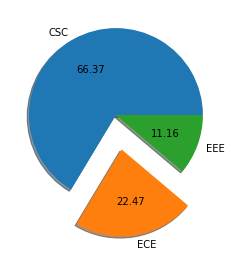

In [ ]:
 #using matplotlib
df = df_all.groupby('Department').sum()
plt.pie(df['CodeKata Score'],labels = ['CSC','ECE','EEE'],explode= [0,0.4,0],shadow = True,autopct = '%.2f') 

###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

<BarContainer object of 3 artists>

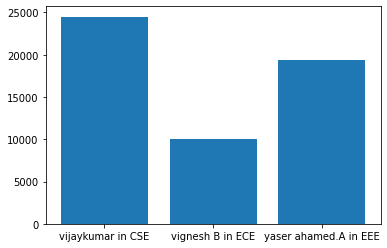

In [ ]:
data = df_all.groupby('Department').max()['CodeKata Score']
plt.bar(['vijaykumar in CSE','vignesh B in ECE','yaser ahamed.A in EEE'],data)